In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#resoudre le probleme de prendre les decision

In [3]:
quality=ctrl.Antecedent(np.arange(0,11,1),'quality')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(0,26,1),'tip')

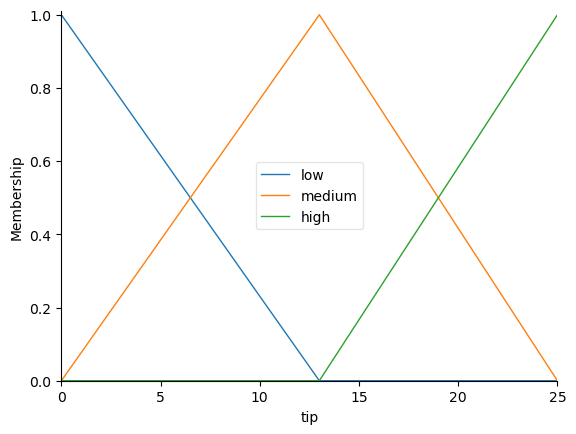

In [6]:
# Création des fonctions d'appartenance
quality['poor'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['average'] = fuzz.trimf(quality.universe, [0, 5, 10])
quality['good'] = fuzz.trimf(quality.universe, [5, 10, 10])

service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])
tip.view()

C:\Users\LENOVO\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


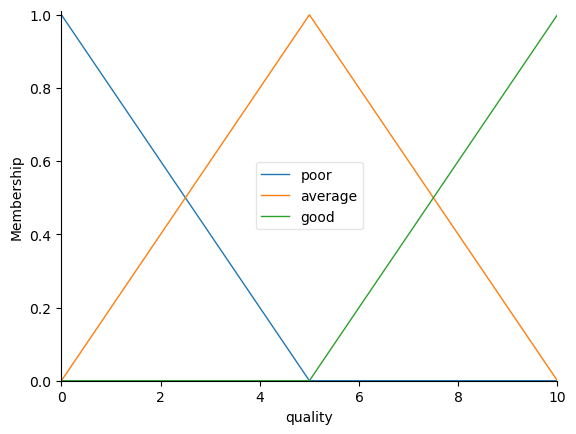

In [5]:
quality.view()

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

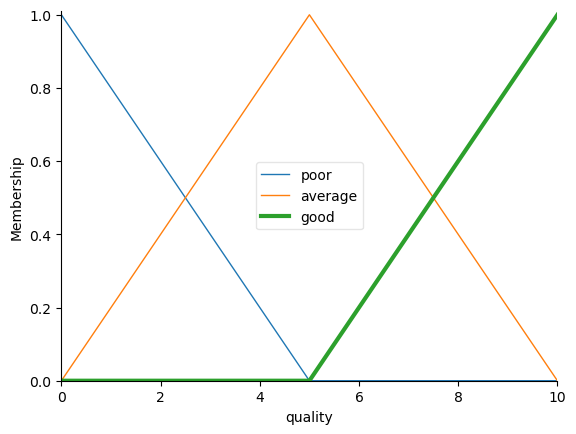

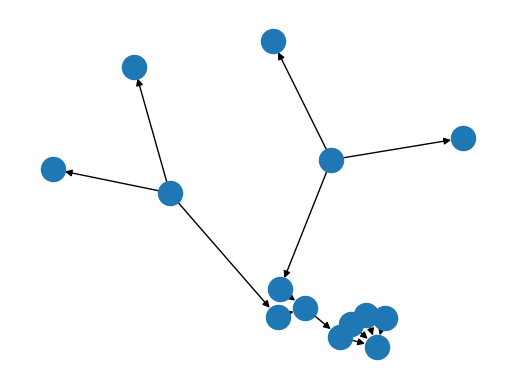

In [17]:


# Visualisation des fonctions d'appartenance
quality['good'].view()

# Création des règles
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])
rule1.view()


In [20]:
# Création du système de contrôle
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)



Estimation du pourboire : 19.847607361963192


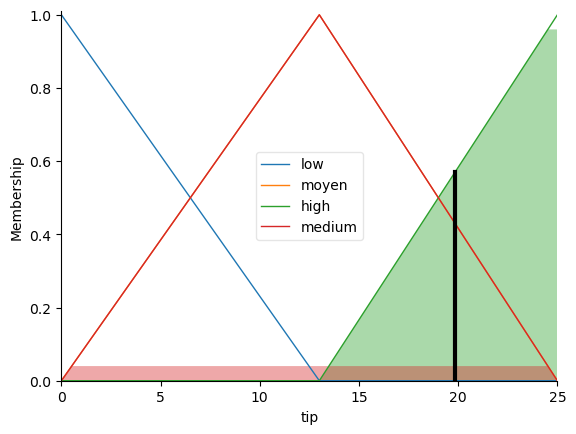

In [23]:
# Entrées
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8
# Calcul de la sortie
tipping.compute()



# Affichage de la valeur de sortie
print("Estimation du pourboire :", tipping.output['tip'])

# Visualisation de l'activation des règles
tip.view(sim=tipping)